In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("processed_data.xlsx")

In [3]:
df.head()

,source_prob,density,wage,is_female,age,num_of_interest,first_payment_amount,from_apll_to_first_trial,first_payment_items_count,avg_amount,...,som_4,som_5,som_6,som_7,fuzzy_2,fuzzy_3,fuzzy_4,fuzzy_5,fuzzy_6,fuzzy_7
0,0.098217,4941.45,100506,1,19.000000,16,25280.0,897,32,25280.00,...,3,0,5,0,1,0,1,1,5,3
1,0.069038,7.00,37488,1,30.000000,18,7920.0,2389,8,4950.00,...,2,2,3,2,1,0,1,2,1,2
2,0.094686,4941.45,100506,1,9.000000,1,8720.0,4604,8,2906.66,...,3,0,5,0,0,2,0,3,2,4
3,0.069795,25.20,26220,1,34.000000,7,7920.0,3358,8,7920.00,...,2,2,3,2,1,1,2,4,0,1
4,0.094686,7.00,37488,1,26.457796,14,7920.0,12433,8,3960.00,...,2,2,3,3,1,1,3,4,4,2


In [4]:
df.columns

Index(['source_prob', 'density', 'wage', 'is_female', 'age', 'num_of_interest',
       'first_payment_amount', 'from_apll_to_first_trial',
       'first_payment_items_count', 'avg_amount', 'ltv', 'k_mean_2',
       'k_mean_3', 'k_mean_4', 'k_mean_5', 'k_mean_6', 'k_mean_7',
       'agglomerative_clustering_2', 'agglomerative_clustering_3',
       'agglomerative_clustering_4', 'agglomerative_clustering_5',
       'agglomerative_clustering_6', 'agglomerative_clustering_7', 'som_2',
       'som_3', 'som_4', 'som_5', 'som_6', 'som_7', 'fuzzy_2', 'fuzzy_3',
       'fuzzy_4', 'fuzzy_5', 'fuzzy_6', 'fuzzy_7'],
      dtype='object')

In [5]:
columns=list(df.columns)

In [6]:
df_feature=df[columns[:11]]
clusters_name=columns[11:]
df_clustering=df[columns[11:]]

## Калински и Харабаша Calinski-Harabasz

In [7]:
from sklearn.metrics import calinski_harabasz_score

In [8]:
calinski_harabasz_coefficients = []
for i in range(len(clusters_name)):
    score = calinski_harabasz_score(df_feature, df[clusters_name[i]])
    calinski_harabasz_coefficients.append(score)

In [9]:
calinski_harabasz_coefficients[6*2:6*(2+1)]

[8815.973862812032,
 11157.292184791357,
 8222.255235753473,
 8954.490564480506,
 12664.355094734263,
 12261.862900186778]

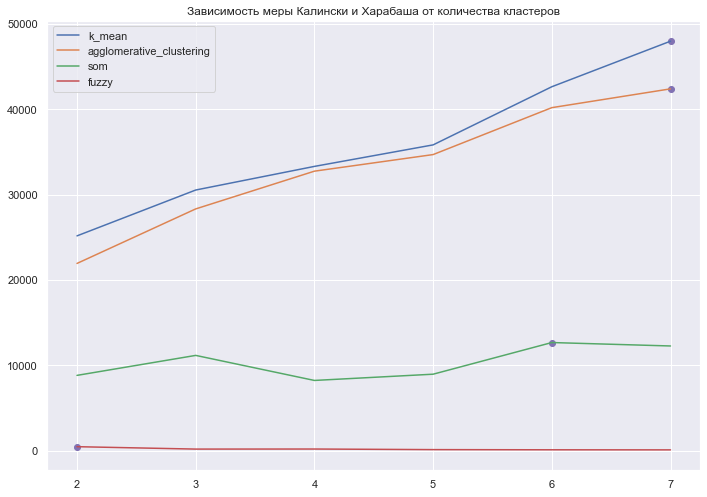

In [10]:
a=np.arange(8)
for i in range (4):
    
    curr_y=calinski_harabasz_coefficients[6*i:6*(i+1)]
    max_el=max(curr_y)
    max_index=0
    
    for index,el in enumerate(curr_y):
        if el==max_el:
            max_index=index
                    
    plt.plot(a[2:],curr_y, label=clusters_name[i*6][:-2])
    plt.scatter(max_index+2,max_el, c='m', alpha=1)
    
plt.title("Зависимость меры Калински и Харабаша от количества кластеров")
plt.legend()
plt.savefig("image/quality/calinski_harabasz_score.png")
plt.show()

## Силуэтная мера

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_coefficients = []
for i in range(len(clusters_name)):
    score = silhouette_score(df_feature, df[clusters_name[i]])
    silhouette_coefficients.append(score)

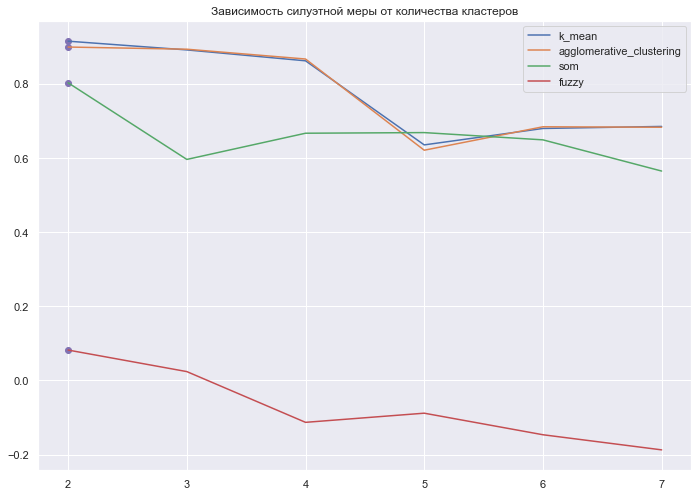

In [13]:
a=np.arange(8)
for i in range (4):
    curr_y=silhouette_coefficients[6*i:6*(i+1)]
    max_el=max(curr_y)
    max_index=0
    for index,el in enumerate(curr_y):
        if el==max_el:
            max_index=index
                    
    plt.plot(a[2:],curr_y, label=clusters_name[i*6][:-2])
    plt.scatter(max_index+2,max_el, c='m', alpha=1)
plt.title("Зависимость силуэтной меры от количества кластеров")
plt.legend()
plt.savefig("image/quality/silhouette_score.png")
plt.show()

## Дэвис-Боулдин

In [14]:
from sklearn.metrics import davies_bouldin_score

In [15]:
davies_bouldin_coefficients = []
for i in range(len(clusters_name)):
    score = davies_bouldin_score(df_feature, df[clusters_name[i]])
    davies_bouldin_coefficients.append(score)

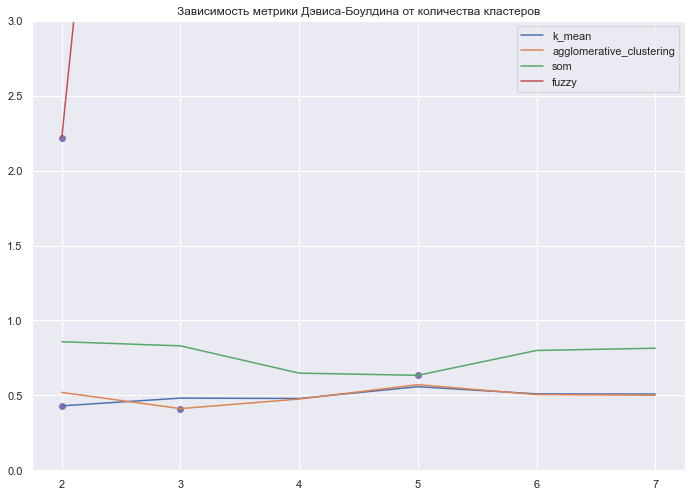

In [16]:
a=np.arange(8)
for i in range (4):
    curr_y=davies_bouldin_coefficients[6*i:6*(i+1)]
    min_el=min(curr_y)
    min_index=0
    for index,el in enumerate(curr_y):
        if el==min_el:
            min_index=index
                    
    plt.plot(a[2:],curr_y, label=clusters_name[i*6][:-2])
    plt.scatter(min_index+2,min_el, c='m', alpha=1)
    
plt.title("Зависимость метрики Дэвиса-Боулдина от количества кластеров")
plt.legend()
plt.ylim(0,3)
plt.savefig("image/quality/davies_bouldin_score.png")
plt.show()

## Dunn index
Kovács, F.; Legány, C. & Babos, A. Cluster Validity Measurement Techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence, 2005.

In [17]:
import pandas as pd
from sklearn import datasets
from jqmcvi.jqmcvi import base

In [18]:
df_kmean_2cl=df[columns[:12]]

In [19]:
df_kmean_2cl.head()

,source_prob,density,wage,is_female,age,num_of_interest,first_payment_amount,from_apll_to_first_trial,first_payment_items_count,avg_amount,ltv,k_mean_2
0,0.098217,4941.45,100506,1,19.000000,16,25280.0,897,32,25280.00,25280.0,0
1,0.069038,7.00,37488,1,30.000000,18,7920.0,2389,8,4950.00,14850.0,0
2,0.094686,4941.45,100506,1,9.000000,1,8720.0,4604,8,2906.66,8720.0,0
3,0.069795,25.20,26220,1,34.000000,7,7920.0,3358,8,7920.00,7920.0,0
4,0.094686,7.00,37488,1,26.457796,14,7920.0,12433,8,3960.00,7920.0,0


https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/

In [20]:
dunn_values=[]
for i in range(11,35):
    new_df=np.column_stack(( np.array(df_feature), np.array(df[columns[i]]) ))
    cluster_list=[]
    for j in range(7):
        tmp_cluster=new_df[new_df[:,-1]==j][:100]
        if tmp_cluster.shape[0]>0:
            cluster_list.append(tmp_cluster)
    dunn_values.append(base.dunn(cluster_list))
    print(columns[i])

k_mean_2
k_mean_3
k_mean_4
k_mean_5
k_mean_6
k_mean_7
agglomerative_clustering_2
agglomerative_clustering_3
agglomerative_clustering_4
agglomerative_clustering_5
agglomerative_clustering_6
agglomerative_clustering_7
som_2
som_3
som_4
som_5
som_6
som_7
fuzzy_2
fuzzy_3
fuzzy_4
fuzzy_5
fuzzy_6
fuzzy_7


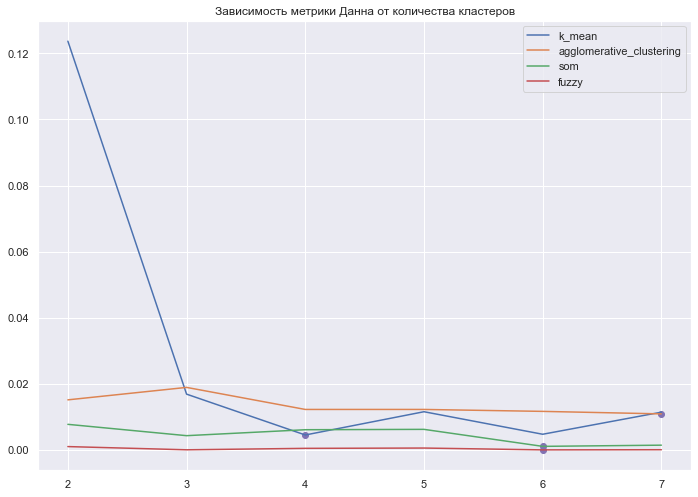

In [21]:
a=np.arange(8)
for i in range (4):
    curr_y=dunn_values[6*i:6*(i+1)]
    min_el=min(curr_y)
    min_index=0
    for index,el in enumerate(curr_y):
        if el==min_el:
            min_index=index
                    
    plt.plot(a[2:],curr_y, label=clusters_name[i*6][:-2])
    plt.scatter(min_index+2,min_el, c='m', alpha=1)
    
plt.title("Зависимость метрики Данна от количества кластеров")
plt.legend()
plt.savefig("image/quality/dunn_score.png")
plt.show()